In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_full, y_train_full),(x_test,y_test) = fashion_mnist.load_data()

reshape

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']

In [7]:
x_train_full.shape

(60000, 28, 28)

In [8]:
x_train_full = x_train_full.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

normalisation

In [9]:
x_train_n = x_train_full/255.0
x_test_n = x_test/255.0

split

In [10]:
x_valid , x_train = x_train_n[:5000], x_train_n[5000:]
y_valid , y_train = y_train_full[:5000], y_train_full[5000:]
x_test_n = x_test_n

seed

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

++++++++++++++++++++++++++++++++++++++++

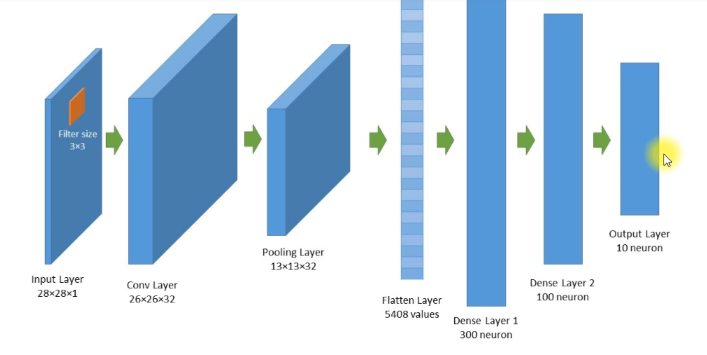

In [14]:
from IPython.display import Image
image_path = './img.png'
Image(filename=image_path)

++++++++++++++++++++++++++++++++++++++++++

model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

- 32 filters
- filter size 3*3
- padding is "same"
- activation is "relu"
- pooling size "2*2"
- classification, so outer layer is "softmax"

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 300)               1881900   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

In [18]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [19]:
model_history = model.fit(x_train, y_train, epochs=10, validation_data=(x_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 50s 28ms/step - loss: 0.7033 - accuracy: 0.7530 - val_loss: 0.5530 - val_accuracy: 0.8060
Epoch 2/10
1719/1719 [==============================] - 47s 27ms/step - loss: 0.4600 - accuracy: 0.8331 - val_loss: 0.3889 - val_accuracy: 0.8668
Epoch 3/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.4037 - accuracy: 0.8544 - val_loss: 0.6023 - val_accuracy: 0.7742
Epoch 4/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3700 - accuracy: 0.8668 - val_loss: 0.3409 - val_accuracy: 0.8810
Epoch 5/10
1719/1719 [==============================] - 44s 25ms/step - loss: 0.3458 - accuracy: 0.8751 - val_loss: 0.3348 - val_accuracy: 0.8802
Epoch 6/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3234 - accuracy: 0.8831 - val_loss: 0.3181 - val_accuracy: 0.8900
Epoch 7/10
1719/1719 [==============================] - 45s 26ms/step - loss: 0.3079 - accuracy: 0.8877 - val_loss: 0.3166 -

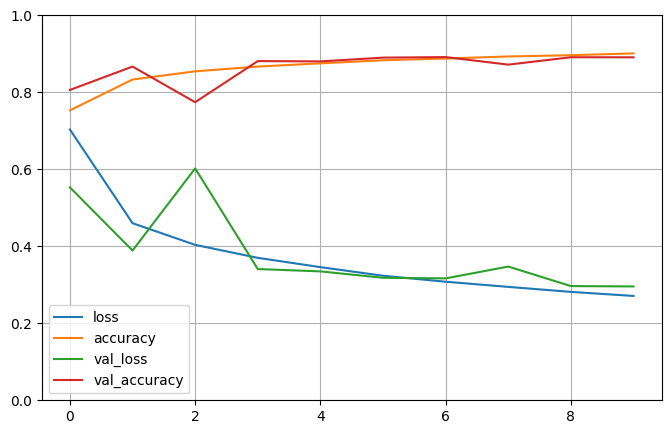

In [20]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [21]:
ev = model.evaluate(x_test_n, y_test)
ev

313/313 [==============================] - 9s 30ms/step - loss: 0.3230 - accuracy: 0.8788


[0.3229933977127075, 0.8787999749183655]

In [27]:
x_new = x_test[:3]
pred = model.predict(x_new)
y_pred = np.argmax(pred, axis=-1)
y_pred

1/1 [==============================] - 0s 24ms/step


array([9, 2, 1], dtype=int64)

AxesImage(size=(28, 28))


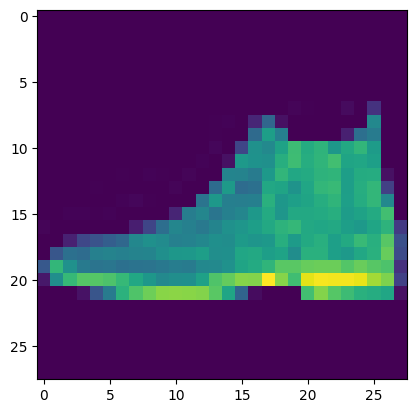

In [23]:
print(plt.imshow(x_test[0].reshape(28,28)))

### without pooling layer - more params, more computation power needed

In [29]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation='relu'))
model_a.add(keras.layers.Dense(100, activation='relu'))
model_a.add(keras.layers.Dense(10, activation='softmax'))

In [30]:
model_a.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 flatten_2 (Flatten)         (None, 25088)             0         
                                                                 
 dense_5 (Dense)             (None, 300)               7526700   
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
Total params: 7,558,130
Trainable params: 7,558,130
Non-trainable params: 0
_________________________________________________________________


In [32]:
model_a.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

only 2 epoc taken

In [33]:
model_a_history = model_a.fit(x_train, y_train, epochs=2, validation_data=(x_valid, y_valid))

Epoch 1/2
1719/1719 [==============================] - 149s 86ms/step - loss: 0.6210 - accuracy: 0.7799 - val_loss: 0.5163 - val_accuracy: 0.8180
Epoch 2/2
1719/1719 [==============================] - 148s 86ms/step - loss: 0.4368 - accuracy: 0.8403 - val_loss: 0.3752 - val_accuracy: 0.8652
